**Feature Engineering** == Cleaning / Pre-processing your columns! 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')

1. train.csv
    - training subsample
    - testing subsample
2. test.csv

In [2]:
X = df[['Pclass', 'Sex', 'Embarked', 'Age']]
#matrix

In [3]:
y = df['Survived']
#vector

In [4]:
X.shape, y.shape

((891, 4), (891,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 4), (223, 4), (668,), (223,))

---

In [8]:
# X_train, y_train

In [9]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

### Now we need Feature Engineering!

In [10]:
X_train.dtypes

Pclass        int64
Sex          object
Embarked     object
Age         float64
dtype: object

In [11]:
X_train.isna().sum()

Pclass        0
Sex           0
Embarked      2
Age         132
dtype: int64

### 1. Missing values! (Imputation)

In [12]:
X_train['Embarked'].mode()

0    S
dtype: object

In [13]:
pd.options.mode.chained_assignment = None
# X_train.dropna(subset=['Embarked'], inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode(), inplace=True) 

In [14]:
X_train['Age'].fillna(value=X_train['Age'].median(), inplace=True) #maybe there's a smarter way to do this!

In [15]:
# import numpy as np
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).fillna(method='bfill')
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).fillna(method='ffill')
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).interpolate(method='linear')

custom filling -- > df.iterrows()

In [16]:
X_train.isna().sum() #Great!!

Pclass      0
Sex         0
Embarked    2
Age         0
dtype: int64

#### 2. Deal with non-numeric values!

1. pd.factorize()

In [17]:
X_train['Sex_Number'] = pd.factorize(X_train['Sex'], sort=True)[0]

2. One-hot-encoding (pd.get_dummies())

In [18]:
# X_train['Embarked']

In [19]:
embarked_cols = pd.get_dummies(X_train['Embarked'])

In [20]:
X_train_merged = pd.merge(left=X_train, right=embarked_cols, how='inner', on=X_train.index).set_index('key_0')

In [21]:
X_train_final = X_train_merged.drop(['Sex', 'Embarked', 'S'], axis=1)
X_train_final.head()

,Pclass,Age,Sex_Number,C,Q
key_0,,,,,
298,1,28.00,1,0,0
884,3,25.00,1,0,0
247,2,24.00,0,0,0
478,3,22.00,1,0,0
305,1,0.92,1,0,0


In [22]:
m.fit(X_train_final, y_train)

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
m.score(X_train_final, y_train)

0.7964071856287425

In [24]:
# statsmodels

In [25]:
##### m.coef_

In [26]:
X_train_final.columns

Index(['Pclass', 'Age', 'Sex_Number', 'C', 'Q'], dtype='object')

In [27]:
# m.score(X_test, y_test)

### Wrap all feature-engineering changes into a single-function!

In [55]:
def feature_engineer(df):

    #1. 
    df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

    #2. 
    df['Age'].fillna(value=df['Age'].median(), inplace=True) #maybe there's a smarter way to do this!

    #3.
    df['Sex_Number'] = pd.factorize(df['Sex'], sort=True)[0]

    #4. 
    embarked_cols = pd.get_dummies(df['Embarked'])

    #5. 
    df_merged = pd.merge(left=df, right=embarked_cols, how='inner', on=df.index).set_index('key_0')

    #6. 
    df_final = df_merged.drop(['Sex', 'Embarked', 'S'], axis=1)

    return df_final
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
X_test_final = feature_engineer(X_test)

In [30]:
m.predict(X_test_final)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [31]:
m.score(X_test_final, y_test)

0.7847533632286996

### 1. We should try to split our data set into training and testing sub-samples as early as we can.
   - but, this is flexible -- e.g. you can dropna's from the entire dataset before filling.

### 2. We need to feature engineer our testing data in the same way that we feature-engineered our training data.
   - otherwise our model will be confused! (i.e. error)
   - writing a function is a nice way to do this.

### 3. Feature Engineering includes any pre-processing techniques, such as:
   - imputation, dropping missing values
   - converting strings / non-numeric values into numeric values
   - other things: binning, scaling, combining features

    
### 4. Ideally, your testing score is about the same as your training score
   - this means your model has generalized well and learned useful insights from the data without overfitting!!!
   - overfitting is when training score >>> testing score

---

## Feature Engineering continued: 

### Lets pick up where Paul dropped off! We're continuing to look at visualisation and pre-processing

#### Visualisation
* Correlation matrix
* Pairplot matrix
* LogReg feature coefficients

In [32]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


import pandas as pd
df=pd.read_csv('train.csv')
df.head

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
y=df['Survived'] # we want to predict the survived column
X=df.drop('Survived',axis=1) # we dropthis column because it is the one that we want to predict

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
Xandy=X_train.copy()
Xandy['Survived']=y_train

In [38]:
y_train.shape

(668,)

### Correlation matrix for X data
* Are there features which i may need to drop
* which features corrala

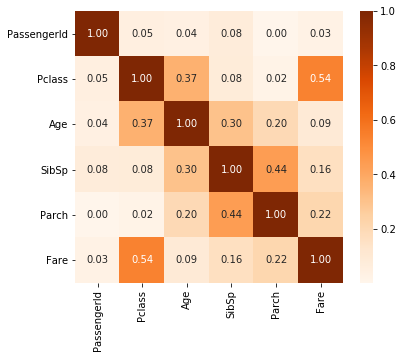

In [39]:
corr_matrix=X_train.corr()
#pd.set_option('precision',3) # it sets all the float to 3 decimals in your running pandas data's
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix.abs(), cmap='Oranges',annot=True, fmt='.2f')

/home/spiced/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/spiced/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/spiced/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/spiced/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


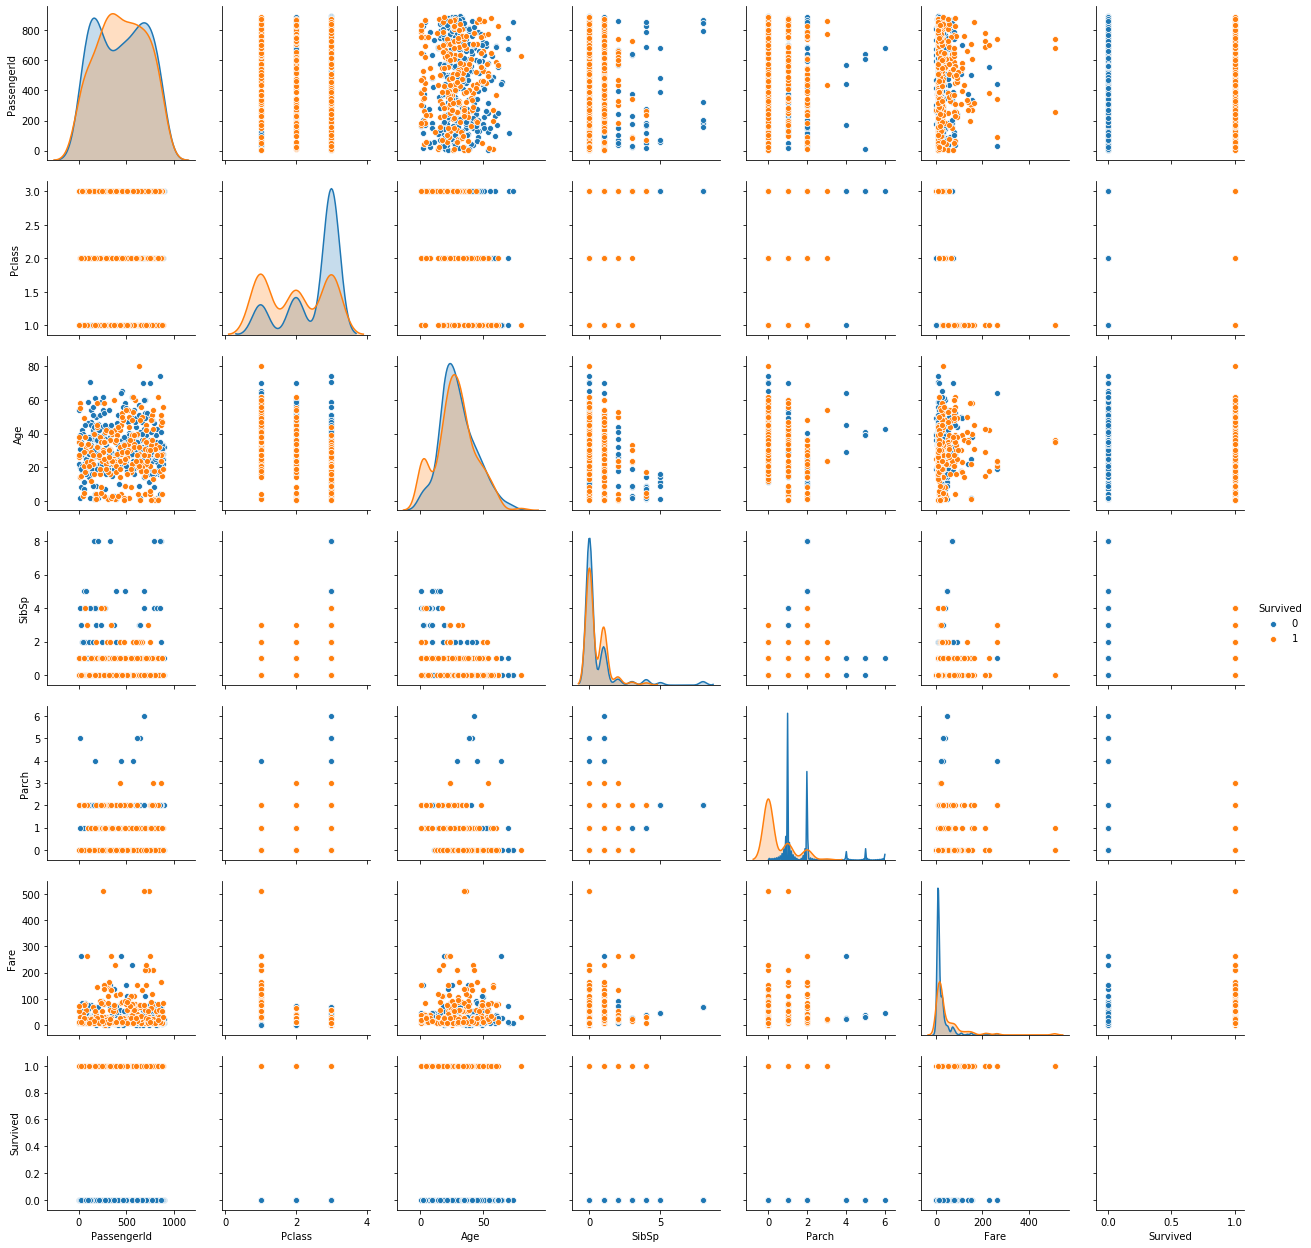

In [40]:
sns.pairplot(Xandy, hue='Survived')

In [41]:
X_train.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5,C106,S


### Correlation matrix for X and y



In [42]:
#sns.heatmap(Xandy.corr().abs(),cmap='Oranges',annot=True,fmt='.2f')

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
mms=MinMaxScaler() # normalizing your data. divide everything by the largest number in the series
# all numbers are scaled to between zero and one
X_train['mms_sibsp']=mms.fit_transform(X_train[['SibSp']])
X_train.describe()

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,mms_sibsp
count,668.000000,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,447.450599,2.333832,29.421343,0.553892,0.372754,32.179397,0.069237
std,258.038366,0.823707,14.526010,1.185279,0.795588,51.604012,0.148160
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,221.750000,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000
50%,452.500000,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000,0.125000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


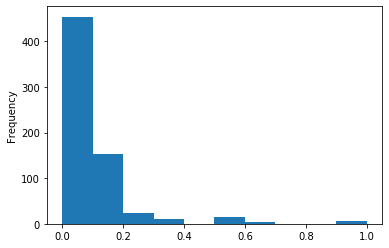

In [45]:
X_train['mms_sibsp'].plot.hist()

In [46]:
# StandartScaler demeans your data - mean becomes zero, stdev=1
ssc=StandardScaler()
X_train['ssc_SibSp']=ssc.fit_transform(X_train[['SibSp']])

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,mms_sibsp,ssc_SibSp
count,668.000000,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000,6.680000e+02
mean,447.450599,2.333832,29.421343,0.553892,0.372754,32.179397,0.069237,-1.568938e-16
std,258.038366,0.823707,14.526010,1.185279,0.795588,51.604012,0.148160,1.000749e+00
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-4.676596e-01
25%,221.750000,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000,-4.676596e-01
50%,452.500000,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000,-4.676596e-01
75%,673.500000,3.000000,38.000000,1.000000,0.000000,30.500000,0.125000,3.766555e-01
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,6.286861e+00


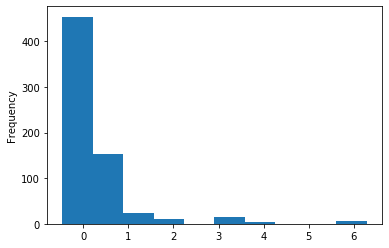

In [48]:
X_train['ssc_SibSp'].plot.hist()

## Binning of Data

* Converting continuos data into categorical data

* pd.cut - creates bins of equal width
* pd.qcut - creats bins of equal size

In [49]:
X_train['Fare_cut']=pd.cut(X_train['Fare'], bins=4)

In [50]:
X_train['Fare_Qcut']=pd.qcut(X_train['Fare'],4)

In [51]:
y=pd.Series(y_train)

In [52]:
X_train['Fare_cut'].unique()

[(-0.512, 128.082], (128.082, 256.165], (256.165, 384.247], (384.247, 512.329]]
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [53]:
X_train['Fare_Qcut'].unique()

[(14.4, 30.5], (-0.001, 7.925], (30.5, 512.329], (7.925, 14.4]]
Categories (4, interval[float64]): [(-0.001, 7.925] < (7.925, 14.4] < (14.4, 30.5] < (30.5, 512.329]]

In [54]:
new_column.map() #map turns an old value into a new one

NameError: name 'new_column' is not defined